# Deep Hedging for nonlinear generalized affine processes

# Example: Path-dependent Option, Lookback Call

Import Packages

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D
from Functions import*
from matplotlib import rcParams

Execute if it should be run on a GPU

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Write a function to generate paths of the SDE
$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t,~t\geq 0,\\
X_0 = x_0
$$
using the Euler-Maruyama Method, i.e., through
$$
X_{i+1} = X_i+(b_0+b_1 X_i) \Delta t_i +(a_0+a_1 X_i)^\gamma  \Delta W_i,~i=1,\dots,n
$$
with $\Delta t_i = T/n$ and $\Delta W_i = W_{(i+1)T/n}-W_{iT/n}$ and $X_0 = x_0$

Write a function to determine the optimal hedge based on a deep learning approach

Test it in a purely nonlinear setting:

$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t
$$

for 

\begin{align}
a_0 &\in [0.3,0.7] \\
a_1 &\in [0.4,0.6] \\
b_0 &\in [-0.2,0.2] \\
b_1 &\in [-0.1,0.1] \\
\gamma &\in [0.5,1.5]
\end{align}

We specify the option Payoff:
$$
\Phi(X)= \max((X)_{0\leq t \leq T}-12)^+
$$

In [3]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(tf.math.reduce_max(path)-12)

price, hedge = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Iteration:10, Price of Hedge: 0.4241017997264862, Loss: 0.39284035563468933
Iteration:20, Price of Hedge: 0.40673860907554626, Loss: 0.36988112330436707
Iteration:30, Price of Hedge: 0.3849727511405945, Loss: 0.3031018376350403
Iteration:40, Price of Hedge: 0.3668188452720642, Loss: 0.2875165641307831
Iteration:50, Price of Hedge: 0.35553863644599915, Loss: 0.25507572293281555
Iteration:60, Price of Hedge: 0.3531927168369293, Loss: 0.26694658398628235
Iteration:70, Price of Hedge: 0.3559020459651947, Lo

Iteration:990, Price of Hedge: 0.3580187261104584, Loss: 0.1581048220396042
Iteration:1000, Price of Hedge: 0.3676620125770569, Loss: 0.14983806014060974
Iteration:1010, Price of Hedge: 0.361613392829895, Loss: 0.17540577054023743
Iteration:1020, Price of Hedge: 0.36307093501091003, Loss: 0.16759684681892395
Iteration:1030, Price of Hedge: 0.36108893156051636, Loss: 0.1749345362186432
Iteration:1040, Price of Hedge: 0.3490865230560303, Loss: 0.22275812923908234
Iteration:1050, Price of Hedge: 0.3482838571071625, Loss: 0.23460447788238525
Iteration:1060, Price of Hedge: 0.3680357038974762, Loss: 0.153588205575943
Iteration:1070, Price of Hedge: 0.3666064143180847, Loss: 0.15193989872932434
Iteration:1080, Price of Hedge: 0.36148205399513245, Loss: 0.1796722710132599
Iteration:1090, Price of Hedge: 0.3605627715587616, Loss: 0.17864805459976196
Iteration:1100, Price of Hedge: 0.35698890686035156, Loss: 0.12120959162712097
Iteration:1110, Price of Hedge: 0.351433664560318, Loss: 0.14619939

Iteration:2050, Price of Hedge: 0.35707998275756836, Loss: 0.09447754174470901
Iteration:2060, Price of Hedge: 0.359063982963562, Loss: 0.136164128780365
Iteration:2070, Price of Hedge: 0.3567303419113159, Loss: 0.08780306577682495
Iteration:2080, Price of Hedge: 0.35731083154678345, Loss: 0.10294564068317413
Iteration:2090, Price of Hedge: 0.3632773756980896, Loss: 0.10273405909538269
Iteration:2100, Price of Hedge: 0.3678527772426605, Loss: 0.1415608823299408
Iteration:2110, Price of Hedge: 0.3742263615131378, Loss: 0.12491549551486969
Iteration:2120, Price of Hedge: 0.37507522106170654, Loss: 0.13136707246303558
Iteration:2130, Price of Hedge: 0.3621337115764618, Loss: 0.11253087967634201
Iteration:2140, Price of Hedge: 0.35536426305770874, Loss: 0.08891066908836365
Iteration:2150, Price of Hedge: 0.35717013478279114, Loss: 0.18174904584884644
Iteration:2160, Price of Hedge: 0.364034503698349, Loss: 0.16823013126850128
Iteration:2170, Price of Hedge: 0.3635334074497223, Loss: 0.1662

Iteration:3100, Price of Hedge: 0.3577449321746826, Loss: 0.14759905636310577
Iteration:3110, Price of Hedge: 0.36805543303489685, Loss: 0.13098229467868805
Iteration:3120, Price of Hedge: 0.3706997334957123, Loss: 0.11191694438457489
Iteration:3130, Price of Hedge: 0.3579308092594147, Loss: 0.09722784161567688
Iteration:3140, Price of Hedge: 0.35362064838409424, Loss: 0.14989307522773743
Iteration:3150, Price of Hedge: 0.36175236105918884, Loss: 0.15849444270133972
Iteration:3160, Price of Hedge: 0.36344847083091736, Loss: 0.09759199619293213
Iteration:3170, Price of Hedge: 0.36730557680130005, Loss: 0.08516718447208405
Iteration:3180, Price of Hedge: 0.3655577600002289, Loss: 0.0986446961760521
Iteration:3190, Price of Hedge: 0.3623444736003876, Loss: 0.11747800558805466
Iteration:3200, Price of Hedge: 0.3718985319137573, Loss: 0.10163325816392899
Iteration:3210, Price of Hedge: 0.3632482588291168, Loss: 0.16889464855194092
Iteration:3220, Price of Hedge: 0.3486846685409546, Loss: 0.

Iteration:4150, Price of Hedge: 0.35919636487960815, Loss: 0.11726440489292145
Iteration:4160, Price of Hedge: 0.3562336266040802, Loss: 0.12726402282714844
Iteration:4170, Price of Hedge: 0.3533101975917816, Loss: 0.1031029224395752
Iteration:4180, Price of Hedge: 0.3676292598247528, Loss: 0.1106829047203064
Iteration:4190, Price of Hedge: 0.36687278747558594, Loss: 0.15133924782276154
Iteration:4200, Price of Hedge: 0.3668923079967499, Loss: 0.1019744724035263
Iteration:4210, Price of Hedge: 0.3599081039428711, Loss: 0.07047490775585175
Iteration:4220, Price of Hedge: 0.35523730516433716, Loss: 0.10429620742797852
Iteration:4230, Price of Hedge: 0.3588365614414215, Loss: 0.1719840168952942
Iteration:4240, Price of Hedge: 0.3745320737361908, Loss: 0.1355041265487671
Iteration:4250, Price of Hedge: 0.37177667021751404, Loss: 0.10340327024459839
Iteration:4260, Price of Hedge: 0.34584030508995056, Loss: 0.0961403176188469
Iteration:4270, Price of Hedge: 0.35248297452926636, Loss: 0.0997

Iteration:5200, Price of Hedge: 0.3451032340526581, Loss: 0.08226553350687027
Iteration:5210, Price of Hedge: 0.344862699508667, Loss: 0.09451858699321747
Iteration:5220, Price of Hedge: 0.3647415339946747, Loss: 0.12023015320301056
Iteration:5230, Price of Hedge: 0.3706820607185364, Loss: 0.14467290043830872
Iteration:5240, Price of Hedge: 0.35850393772125244, Loss: 0.12182624638080597
Iteration:5250, Price of Hedge: 0.35398292541503906, Loss: 0.1349942684173584
Iteration:5260, Price of Hedge: 0.35208702087402344, Loss: 0.11287284642457962
Iteration:5270, Price of Hedge: 0.3712431490421295, Loss: 0.12282522022724152
Iteration:5280, Price of Hedge: 0.3666118383407593, Loss: 0.12993215024471283
Iteration:5290, Price of Hedge: 0.34811532497406006, Loss: 0.11805576086044312
Iteration:5300, Price of Hedge: 0.3506353497505188, Loss: 0.1328836977481842
Iteration:5310, Price of Hedge: 0.35898783802986145, Loss: 0.0965161845088005
Iteration:5320, Price of Hedge: 0.3641825318336487, Loss: 0.097

Iteration:6250, Price of Hedge: 0.3566870093345642, Loss: 0.07364283502101898
Iteration:6260, Price of Hedge: 0.3612767457962036, Loss: 0.07366621494293213
Iteration:6270, Price of Hedge: 0.37323054671287537, Loss: 0.11128269135951996
Iteration:6280, Price of Hedge: 0.36816543340682983, Loss: 0.08125263452529907
Iteration:6290, Price of Hedge: 0.3535265326499939, Loss: 0.08075006306171417
Iteration:6300, Price of Hedge: 0.35566312074661255, Loss: 0.13993826508522034
Iteration:6310, Price of Hedge: 0.35193192958831787, Loss: 0.0634724348783493
Iteration:6320, Price of Hedge: 0.3535626530647278, Loss: 0.0970405861735344
Iteration:6330, Price of Hedge: 0.3590115010738373, Loss: 0.09461112320423126
Iteration:6340, Price of Hedge: 0.35063087940216064, Loss: 0.10780531913042068
Iteration:6350, Price of Hedge: 0.34976255893707275, Loss: 0.06921378523111343
Iteration:6360, Price of Hedge: 0.3520528972148895, Loss: 0.12824797630310059
Iteration:6370, Price of Hedge: 0.3540288507938385, Loss: 0.

Iteration:7300, Price of Hedge: 0.34720563888549805, Loss: 0.11387655138969421
Iteration:7310, Price of Hedge: 0.34607255458831787, Loss: 0.11476987600326538
Iteration:7320, Price of Hedge: 0.35155564546585083, Loss: 0.10924026370048523
Iteration:7330, Price of Hedge: 0.3572840690612793, Loss: 0.14784225821495056
Iteration:7340, Price of Hedge: 0.36194470524787903, Loss: 0.10952958464622498
Iteration:7350, Price of Hedge: 0.3680695593357086, Loss: 0.09939079731702805
Iteration:7360, Price of Hedge: 0.351567804813385, Loss: 0.11504911631345749
Iteration:7370, Price of Hedge: 0.35726436972618103, Loss: 0.10664625465869904
Iteration:7380, Price of Hedge: 0.3582952320575714, Loss: 0.11377288401126862
Iteration:7390, Price of Hedge: 0.36188584566116333, Loss: 0.08607140183448792
Iteration:7400, Price of Hedge: 0.3612196147441864, Loss: 0.09287950396537781
Iteration:7410, Price of Hedge: 0.35370904207229614, Loss: 0.08184008300304413
Iteration:7420, Price of Hedge: 0.35953831672668457, Loss:

Iteration:8350, Price of Hedge: 0.370878666639328, Loss: 0.12126754969358444
Iteration:8360, Price of Hedge: 0.370731383562088, Loss: 0.10735685378313065
Iteration:8370, Price of Hedge: 0.35351595282554626, Loss: 0.1484268456697464
Iteration:8380, Price of Hedge: 0.3457731306552887, Loss: 0.09552410244941711
Iteration:8390, Price of Hedge: 0.3544800877571106, Loss: 0.13069340586662292
Iteration:8400, Price of Hedge: 0.3559625744819641, Loss: 0.09176716953516006
Iteration:8410, Price of Hedge: 0.3685406744480133, Loss: 0.09490716457366943
Iteration:8420, Price of Hedge: 0.36388516426086426, Loss: 0.09358661621809006
Iteration:8430, Price of Hedge: 0.35760796070098877, Loss: 0.16749203205108643
Iteration:8440, Price of Hedge: 0.35155990719795227, Loss: 0.09781043231487274
Iteration:8450, Price of Hedge: 0.3568401336669922, Loss: 0.10058127343654633
Iteration:8460, Price of Hedge: 0.3429725468158722, Loss: 0.08438365161418915
Iteration:8470, Price of Hedge: 0.35804250836372375, Loss: 0.06

Iteration:9400, Price of Hedge: 0.3592985272407532, Loss: 0.10393717885017395
Iteration:9410, Price of Hedge: 0.3570671081542969, Loss: 0.1663699895143509
Iteration:9420, Price of Hedge: 0.357991486787796, Loss: 0.15201336145401
Iteration:9430, Price of Hedge: 0.3475092351436615, Loss: 0.11784771829843521
Iteration:9440, Price of Hedge: 0.3515949845314026, Loss: 0.16779015958309174
Iteration:9450, Price of Hedge: 0.3642054498195648, Loss: 0.09684993326663971
Iteration:9460, Price of Hedge: 0.36051395535469055, Loss: 0.13255290687084198
Iteration:9470, Price of Hedge: 0.364327609539032, Loss: 0.07891565561294556
Iteration:9480, Price of Hedge: 0.3544897139072418, Loss: 0.11308763921260834
Iteration:9490, Price of Hedge: 0.35280749201774597, Loss: 0.08985204994678497
Iteration:9500, Price of Hedge: 0.3448711037635803, Loss: 0.12961065769195557
Iteration:9510, Price of Hedge: 0.35196879506111145, Loss: 0.08196043223142624
Iteration:9520, Price of Hedge: 0.35878777503967285, Loss: 0.100462

In [4]:
#########Load the model if desired:

#hedge=keras.models.load_model('model_nonlinear_gap.h5')

Illustrate the computed hedging strategy

In [39]:
# Increase the size of xticks and yticks
labelsize = 18
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


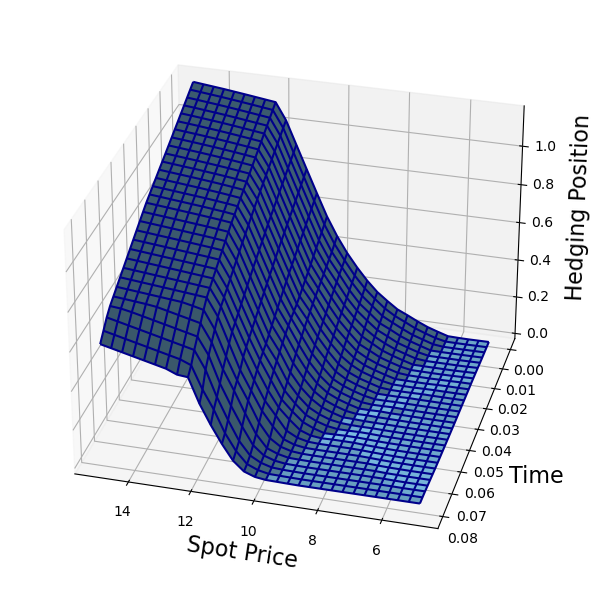

In [44]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid,color = "lightskyblue")
ax.plot_wireframe(X, Y , grid,color = "darkblue",label = "Hedge")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
#plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_3d_path_dependent.eps', format='eps')
plt.show()

Depict the Hedging Error

In [6]:
BATCH_SIZE = 10000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


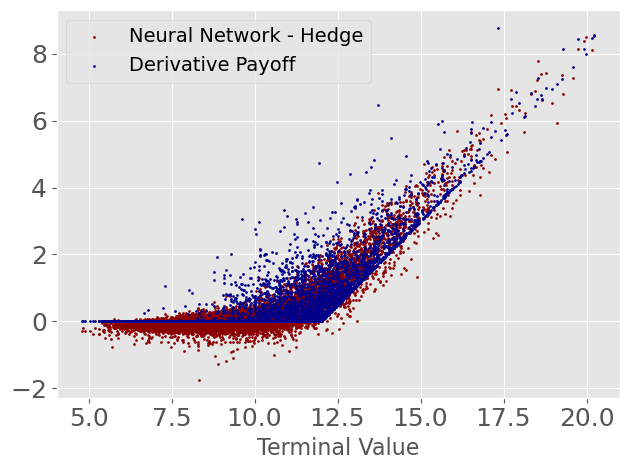

In [17]:
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Neural Network - Hedge",s=2)
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
plt.xlabel("Terminal Value", fontsize=16)
plt.legend( fontsize=14)
plt.tight_layout()
plt.savefig('eps/fig_hedging_mc_path_dependent.eps', format='eps')
plt.show()


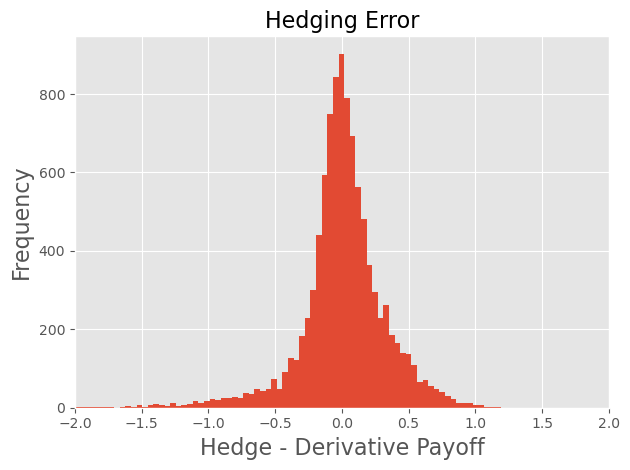

In [48]:
hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
plt.hist(hedging_error,100)
plt.xlim([-2,2])
plt.xlabel("Hedge - Derivative Payoff", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Hedging Error", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_path_dependent.eps', format='eps')
plt.show()


Save the model

In [9]:
hedge.save("model_path_dependent.h5")

# Training of a hedging strategy with fixed Parameters

In [26]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
# Specify parameters as the mean of the respective intervals.
a_0_fix = [0.5,0.5]
a_1_fix = [0.5,0.5]
b_0_fix = [0,0]
b_1_fix = [0,0]
gamma_fix = [1,1]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(tf.math.reduce_max(path)-12)

price_fix, hedge_fix = optimal_hedge(derivative,a_0_fix,a_1_fix,b_0_fix,b_1_fix,gamma_fix,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Iteration:10, Price of Hedge: 0.20912908017635345, Loss: 0.13179238140583038
Iteration:20, Price of Hedge: 0.19874295592308044, Loss: 0.16646581888198853
Iteration:30, Price of Hedge: 0.1853550225496292, Loss: 0.1476086974143982
Iteration:40, Price of Hedge: 0.17639757692813873, Loss: 0.1352272927761078
Iteration:50, Price of Hedge: 0.16861099004745483, Loss: 0.09324147552251816
Iteration:60, Price of Hedge: 0.1647714525461197, Loss: 0.08472949266433716
Iteration:70, Price of Hedge: 0.1670934110879898, 

Iteration:980, Price of Hedge: 0.1714835911989212, Loss: 0.03972403332591057
Iteration:990, Price of Hedge: 0.17025910317897797, Loss: 0.05833577737212181
Iteration:1000, Price of Hedge: 0.17302380502223969, Loss: 0.05937965214252472
Iteration:1010, Price of Hedge: 0.16745151579380035, Loss: 0.03425752744078636
Iteration:1020, Price of Hedge: 0.16376644372940063, Loss: 0.023493068292737007
Iteration:1030, Price of Hedge: 0.1675776094198227, Loss: 0.030604353174567223
Iteration:1040, Price of Hedge: 0.1728944331407547, Loss: 0.03232729807496071
Iteration:1050, Price of Hedge: 0.17062485218048096, Loss: 0.03246281296014786
Iteration:1060, Price of Hedge: 0.1675872504711151, Loss: 0.046044886112213135
Iteration:1070, Price of Hedge: 0.1660601794719696, Loss: 0.04499007388949394
Iteration:1080, Price of Hedge: 0.1681438684463501, Loss: 0.026138994842767715
Iteration:1090, Price of Hedge: 0.17698779702186584, Loss: 0.02852960117161274
Iteration:1100, Price of Hedge: 0.1696595400571823, Loss

Iteration:2020, Price of Hedge: 0.17716830968856812, Loss: 0.039587900042533875
Iteration:2030, Price of Hedge: 0.1624477505683899, Loss: 0.030664727091789246
Iteration:2040, Price of Hedge: 0.16317276656627655, Loss: 0.03422100469470024
Iteration:2050, Price of Hedge: 0.17784415185451508, Loss: 0.02827785350382328
Iteration:2060, Price of Hedge: 0.16855254769325256, Loss: 0.023791475221514702
Iteration:2070, Price of Hedge: 0.1706979125738144, Loss: 0.02318975143134594
Iteration:2080, Price of Hedge: 0.17924915254116058, Loss: 0.02145732194185257
Iteration:2090, Price of Hedge: 0.16932621598243713, Loss: 0.048209454864263535
Iteration:2100, Price of Hedge: 0.16837601363658905, Loss: 0.03318096324801445
Iteration:2110, Price of Hedge: 0.17078793048858643, Loss: 0.0290665440261364
Iteration:2120, Price of Hedge: 0.1702093929052353, Loss: 0.022630516439676285
Iteration:2130, Price of Hedge: 0.16748414933681488, Loss: 0.020720021799206734
Iteration:2140, Price of Hedge: 0.1786080896854400

Iteration:3060, Price of Hedge: 0.16534188389778137, Loss: 0.025039492174983025
Iteration:3070, Price of Hedge: 0.17421188950538635, Loss: 0.017233088612556458
Iteration:3080, Price of Hedge: 0.16959351301193237, Loss: 0.027101853862404823
Iteration:3090, Price of Hedge: 0.17061637341976166, Loss: 0.020666662603616714
Iteration:3100, Price of Hedge: 0.16856616735458374, Loss: 0.03432217985391617
Iteration:3110, Price of Hedge: 0.17400282621383667, Loss: 0.01937876269221306
Iteration:3120, Price of Hedge: 0.16849514842033386, Loss: 0.02535931020975113
Iteration:3130, Price of Hedge: 0.1679990142583847, Loss: 0.030089102685451508
Iteration:3140, Price of Hedge: 0.1732698231935501, Loss: 0.03638613969087601
Iteration:3150, Price of Hedge: 0.16925358772277832, Loss: 0.027352087199687958
Iteration:3160, Price of Hedge: 0.16759254038333893, Loss: 0.020927200093865395
Iteration:3170, Price of Hedge: 0.1693788766860962, Loss: 0.044995784759521484
Iteration:3180, Price of Hedge: 0.1723790466785

Iteration:4100, Price of Hedge: 0.1714722067117691, Loss: 0.029692230746150017
Iteration:4110, Price of Hedge: 0.16578702628612518, Loss: 0.026924677193164825
Iteration:4120, Price of Hedge: 0.17015992105007172, Loss: 0.03675558790564537
Iteration:4130, Price of Hedge: 0.1820547878742218, Loss: 0.027380965650081635
Iteration:4140, Price of Hedge: 0.17015928030014038, Loss: 0.026732908561825752
Iteration:4150, Price of Hedge: 0.16909947991371155, Loss: 0.03294907137751579
Iteration:4160, Price of Hedge: 0.16965381801128387, Loss: 0.03475862368941307
Iteration:4170, Price of Hedge: 0.16946937143802643, Loss: 0.033930711448192596
Iteration:4180, Price of Hedge: 0.1653153896331787, Loss: 0.04615776985883713
Iteration:4190, Price of Hedge: 0.1719232052564621, Loss: 0.022933855652809143
Iteration:4200, Price of Hedge: 0.16861528158187866, Loss: 0.03912410885095596
Iteration:4210, Price of Hedge: 0.17267444729804993, Loss: 0.025667645037174225
Iteration:4220, Price of Hedge: 0.171797603368759

Iteration:5140, Price of Hedge: 0.1696968972682953, Loss: 0.028340017423033714
Iteration:5150, Price of Hedge: 0.16983890533447266, Loss: 0.023353472352027893
Iteration:5160, Price of Hedge: 0.17753638327121735, Loss: 0.02866993099451065
Iteration:5170, Price of Hedge: 0.16446331143379211, Loss: 0.04529473930597305
Iteration:5180, Price of Hedge: 0.16412585973739624, Loss: 0.030142083764076233
Iteration:5190, Price of Hedge: 0.16521012783050537, Loss: 0.022158052772283554
Iteration:5200, Price of Hedge: 0.17029857635498047, Loss: 0.039144910871982574
Iteration:5210, Price of Hedge: 0.16860926151275635, Loss: 0.02042926289141178
Iteration:5220, Price of Hedge: 0.16495366394519806, Loss: 0.01951042376458645
Iteration:5230, Price of Hedge: 0.17569731175899506, Loss: 0.02502061054110527
Iteration:5240, Price of Hedge: 0.16330008208751678, Loss: 0.023102451115846634
Iteration:5250, Price of Hedge: 0.17721380293369293, Loss: 0.03232353925704956
Iteration:5260, Price of Hedge: 0.1727707982063

Iteration:6180, Price of Hedge: 0.17602796852588654, Loss: 0.022367682307958603
Iteration:6190, Price of Hedge: 0.17536379396915436, Loss: 0.028144342824816704
Iteration:6200, Price of Hedge: 0.1603774130344391, Loss: 0.033547453582286835
Iteration:6210, Price of Hedge: 0.17088797688484192, Loss: 0.025910869240760803
Iteration:6220, Price of Hedge: 0.1757148653268814, Loss: 0.023747950792312622
Iteration:6230, Price of Hedge: 0.17412902414798737, Loss: 0.01940479688346386
Iteration:6240, Price of Hedge: 0.16741667687892914, Loss: 0.02964281104505062
Iteration:6250, Price of Hedge: 0.16412316262722015, Loss: 0.029150579124689102
Iteration:6260, Price of Hedge: 0.16875532269477844, Loss: 0.04226166754961014
Iteration:6270, Price of Hedge: 0.17211200296878815, Loss: 0.022734763100743294
Iteration:6280, Price of Hedge: 0.172800213098526, Loss: 0.02338724583387375
Iteration:6290, Price of Hedge: 0.17179612815380096, Loss: 0.030651433393359184
Iteration:6300, Price of Hedge: 0.17115269601345

Iteration:7220, Price of Hedge: 0.17220169305801392, Loss: 0.0316864475607872
Iteration:7230, Price of Hedge: 0.16587795317173004, Loss: 0.018223604187369347
Iteration:7240, Price of Hedge: 0.1729917824268341, Loss: 0.013173654675483704
Iteration:7250, Price of Hedge: 0.17507068812847137, Loss: 0.013761619105935097
Iteration:7260, Price of Hedge: 0.16620507836341858, Loss: 0.020764756947755814
Iteration:7270, Price of Hedge: 0.16167372465133667, Loss: 0.030647311359643936
Iteration:7280, Price of Hedge: 0.1717575043439865, Loss: 0.036649055778980255
Iteration:7290, Price of Hedge: 0.1710837036371231, Loss: 0.015702560544013977
Iteration:7300, Price of Hedge: 0.1658087521791458, Loss: 0.025804217904806137
Iteration:7310, Price of Hedge: 0.18031013011932373, Loss: 0.02435995452105999
Iteration:7320, Price of Hedge: 0.1693952977657318, Loss: 0.01688312366604805
Iteration:7330, Price of Hedge: 0.17232279479503632, Loss: 0.02238745428621769
Iteration:7340, Price of Hedge: 0.1720795184373855

Iteration:8260, Price of Hedge: 0.1713113933801651, Loss: 0.0710785835981369
Iteration:8270, Price of Hedge: 0.1728566288948059, Loss: 0.015746308490633965
Iteration:8280, Price of Hedge: 0.1600515991449356, Loss: 0.021824225783348083
Iteration:8290, Price of Hedge: 0.17538969218730927, Loss: 0.022205442190170288
Iteration:8300, Price of Hedge: 0.1714051365852356, Loss: 0.032734137028455734
Iteration:8310, Price of Hedge: 0.1692184954881668, Loss: 0.01993277296423912
Iteration:8320, Price of Hedge: 0.17581366002559662, Loss: 0.04464766010642052
Iteration:8330, Price of Hedge: 0.16737000644207, Loss: 0.02219870127737522
Iteration:8340, Price of Hedge: 0.16965165734291077, Loss: 0.028474247083067894
Iteration:8350, Price of Hedge: 0.1785479038953781, Loss: 0.028085513040423393
Iteration:8360, Price of Hedge: 0.16564851999282837, Loss: 0.017075106501579285
Iteration:8370, Price of Hedge: 0.162269726395607, Loss: 0.030457209795713425
Iteration:8380, Price of Hedge: 0.1795933097600937, Loss

Iteration:9300, Price of Hedge: 0.16837841272354126, Loss: 0.02918519638478756
Iteration:9310, Price of Hedge: 0.16688746213912964, Loss: 0.029773613438010216
Iteration:9320, Price of Hedge: 0.17187900841236115, Loss: 0.015191366896033287
Iteration:9330, Price of Hedge: 0.16607637703418732, Loss: 0.018641572445631027
Iteration:9340, Price of Hedge: 0.17032690346240997, Loss: 0.04263497516512871
Iteration:9350, Price of Hedge: 0.17510275542736053, Loss: 0.026053432375192642
Iteration:9360, Price of Hedge: 0.16949762403964996, Loss: 0.018009919673204422
Iteration:9370, Price of Hedge: 0.17535214126110077, Loss: 0.019114568829536438
Iteration:9380, Price of Hedge: 0.17469893395900726, Loss: 0.02254534140229225
Iteration:9390, Price of Hedge: 0.1627073884010315, Loss: 0.030035153031349182
Iteration:9400, Price of Hedge: 0.17626923322677612, Loss: 0.019784606993198395
Iteration:9410, Price of Hedge: 0.16632501780986786, Loss: 0.01698930934071541
Iteration:9420, Price of Hedge: 0.17256176471

We display the trained non-robust strategy.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


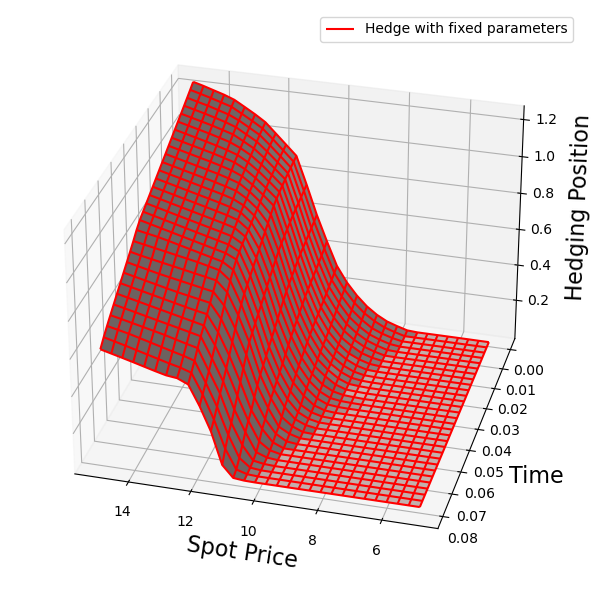

In [41]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid_fix = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid_fix,color = "mistyrose")
ax.plot_wireframe(X, Y , grid_fix,color = "red",label = "Hedge with fixed parameters")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_path_dependent_uncertain_fix.eps', format='eps')
plt.show()

Compare the hedges

In [28]:
style.use('ggplot')
BATCH_SIZE = 10000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)

# The hedge with fix gamma
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_fix = [hedge_fix([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_fix = tf.reduce_sum([hedge_evaluated_fix[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch_fix = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

# The hedge for the model with uncertainty
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)]) 

Compare how the hedges perform.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\julia\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


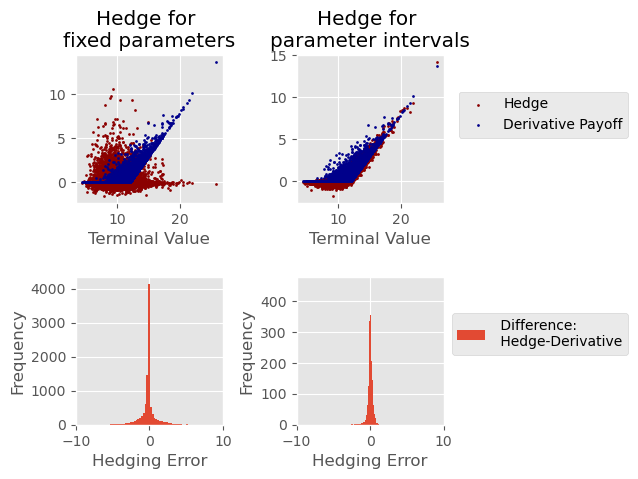

In [29]:
style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5,wspace = 0.5,right=0.7)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_fix + delta_S_fix,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
axs[0,0].set_xlabel("Terminal Value")
axs[0,0].set_title("Hedge for \nfixed parameters")
axs[0,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative",s=2)
axs[0,1].set_xlabel("Terminal Value")
axs[0,1].set_title("Hedge for \nparameter intervals")

hedging_error_fix = ((price_fix + delta_S_fix) - derivative_on_batch).numpy()
axs[1,0].hist(hedging_error_fix,100,label = " Difference:\n Hedge-Derivative")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim([-10,10])
axs[1,0].set_xlabel("Hedging Error")
axs[1,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
axs[1,1].hist(hedging_error,200)
axs[1,1].set_xlabel("Hedging Error")
axs[1,1].set_xlim([-10,10])
axs[1,1].set_ylabel("Frequency")

fig.savefig('eps/fig_path_dependent_example_hedge_error.eps', format='eps')
fig.show()

Adjusted Histogram: Difference between hedging errors

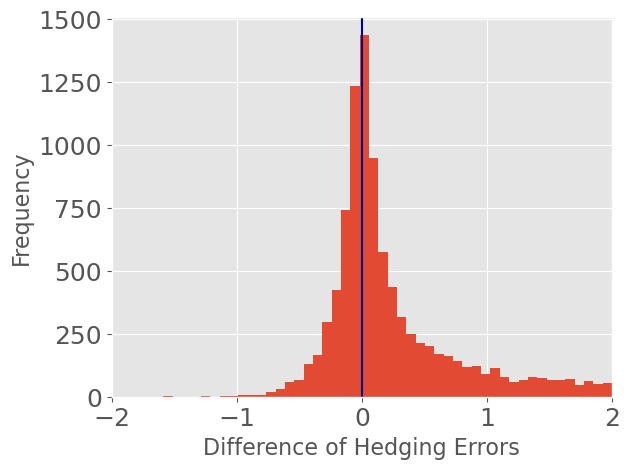

In [40]:
hedging_difference = np.abs(hedging_error_fix) - np.abs(hedging_error)
plt.hist(hedging_difference,200)
plt.axvline(x=0,color="darkblue")
plt.xlim([-2,2])
plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
#plt.title("Difference of Hedging Errors", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_path_dependent_difference.eps', format='eps')
plt.show()

Statistics on Hedging Errors

Fixed Parameters:

In [31]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,10000.000000
mean,0.675515
std,1.053652
min,0.000038
25%,0.078414
50%,0.220422
75%,0.820409
max,13.880273


Robust Parameters:

In [32]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,10000.000000
mean,0.222933
std,0.250309
min,0.000005
25%,0.061927
50%,0.141859
75%,0.297298
max,3.008390
